In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

(8192, 2)
2.231306269923653
[2.23130627e+12]


Text(0.5, 1.0, 'Thermo-mechanical noise. mass-effective=4E-11 [kg]. \n T=300K. f0=153.2473 kHz. Tau = 1.945s. \n dV/dm = 1.49 E6.')

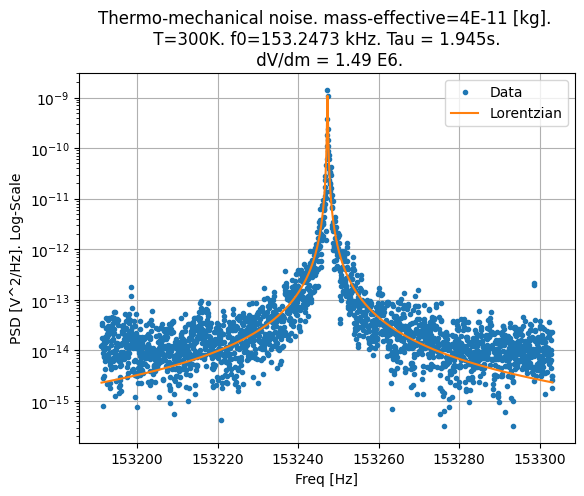

In [24]:
dir = r"C:\Users\SLAB2\Documents\Leo_Thesis_Data\interferometer_characterization\setup_calibration"
f_name = "dVdm_260525_tau_1945s.txt"
fp = os.path.join(dir, f_name)

data = np.loadtxt(fp, comments="%", delimiter=";", skiprows=5)
print(data.shape) # 4096 data points
# i0, i1 = 7000, 10000
i0, i1 = 3000, -3000
# i0, i1 = 0, -1

data_freq = data[i0:i1, 0] # 
data_V = data[i0:i1, 1] # 

kbT = 300 * 1.38E-23
meff = 3.56E-11
f0 = 153.24728E3
q0 = np.pi * f0 * 1.945 # time constant from ring-down

def lorentz_fit(input, calib):
    """ eq. 5.8 Silvan Schmid double-checked, units m**2/Hz
    calib is (dV/dm)^2 to convert to V**2/Hz """
    susceptibility = 1 / ((input-f0)**2 + (f0/(2*q0))**2) 
    factor = kbT / (q0*meff*f0) / (2*np.pi)**3
    
    return factor * susceptibility * calib


dR0 = 1E12 # initial guess for (dV/dm)^2
p0 = [dR0]
popt, _ = curve_fit(lorentz_fit, data_freq, data_V, p0=p0)
data_fit_lorentz = lorentz_fit(data_freq, *popt)

print(popt[-1] * 1e-12)
print(popt)
clb_opt = np.sqrt(popt[-1])
clb_opt_rnd = np.round(clb_opt*1e-6, 2)  # in M

plt.plot(data_freq, data_V, ".", label="Data")
plt.plot(data_freq, data_fit_lorentz, label=f"Lorentzian")
plt.grid()
plt.xlabel("Freq [Hz]")
plt.ylabel("PSD [V^2/Hz]. Log-Scale")
plt.yscale("log")
plt.legend()
plt.title(f"Thermo-mechanical noise. mass-effective=4E-11 [kg]. \n T=300K. f0=153.2473 kHz. Tau = 1.945s. \n dV/dm = {clb_opt_rnd} E6.")